In [200]:
import matplotlib.pyplot as plt
import numpy as np
import pickle
import itertools as iter

n_baseline_frames = 5

In [201]:
def get_active_cells(traces):

    # going to return a dictionary with only active cells, formatted exactly the same as traces

    d = dict.fromkeys(traces.keys())

    for cell in traces:
        if traces[cell]['active'] == True:
            d[cell] = traces[cell]
        else:
            d.pop(cell,None)

    return d

In [202]:
def get_zscored_response(trial,n_baseline_frames):
    baseline = trial[:n_baseline_frames]
    response = trial[n_baseline_frames:]

    baseline_mean = np.average(baseline)
    baseline_std = np.std(baseline)

    zscorer = lambda x: (x-baseline_mean)/baseline_std
    zscore_response = np.array([zscorer(xi) for xi in response])

    return zscore_response

In [203]:
# load the first dictionary file
cell = "C:/Users/Conor/Documents/Imaging_Data/Two-Photon/Psilocybin_Project/Evoked_Cohort_Mice/ID251/ID251_17012023_psilo/TSeries-01172023-1212-045/suite2p/plane0/cells.pkl"

with open(cell,'rb') as f:
    cell_dict = pickle.load(f)

In [204]:
cell_list = list(cell_dict.keys())
nfreq = list(cell_dict[cell_list[0]]['traces'].keys())
nInt = list(cell_dict[cell_list[0]]['traces'][nfreq[0]].keys())
ntrial = list(cell_dict[cell_list[0]]['traces'][nfreq[0]][nInt[0]].keys())
print(nfreq, nInt, ntrial)

[4364, 5371, 6612, 8140, 10020, 12335, 15184, 18691, 23009, 28324, 34867, 42922] [35, 50, 65, 80] [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]


In [205]:
# Select only the active cells in the dictionary.
active = get_active_cells(cell_dict)
active_cell_list = list(active.keys())
print(active_cell_list)

[1, 2, 3, 7, 10, 12, 13, 15, 18, 20, 22, 24, 25, 26, 27, 28, 29, 30, 32, 37, 38, 40, 41, 45, 46, 49, 52, 53, 55, 57, 59, 60, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 73, 74, 76, 77, 78, 79, 80, 86, 88, 94, 99, 105, 107, 108, 109, 110, 112, 115, 125, 127, 138, 141, 143, 144, 145, 149, 155, 159, 164, 170, 172, 173, 176, 178, 179, 180, 183, 188, 189, 190, 201, 202, 205, 214, 215, 218, 225, 226, 230, 231, 236, 238, 246, 247, 249, 250, 254, 255, 258, 263, 264, 267, 268, 275, 278, 289, 291, 301, 303, 305, 306, 308, 318, 319, 321, 324, 326, 330, 343, 349, 353, 372, 386, 416, 417, 420, 422, 435, 458, 461, 476, 478, 488, 503, 531, 539, 550, 564, 565, 763]


In [213]:
print(active[1]['tuning'])

[[ 1.86564773  1.65317736  1.52879227  1.06654362]
 [ 0.42311676  1.20701794  2.20921981  0.21789367]
 [ 1.05347665  0.83037609  0.06689426  1.579106  ]
 [-0.0080934   0.01622518  1.06560377 -0.04982875]
 [ 4.31063845  0.68400966  2.60281194 -0.33314395]
 [ 0.47414872  0.63891448  0.65533697  0.31678904]
 [ 0.2227189   0.40078284 -0.04337828  0.42521931]
 [-0.44277632  0.83579591  0.56624187 -0.34073238]
 [ 1.84659717  0.06944194 -0.02336023  0.03661404]
 [ 1.64875718  0.36614894  0.07643904  4.16473918]
 [ 0.53156951  1.03122367  2.83560193  0.56595373]
 [ 2.27733493  2.06893065 -0.39934237  1.35383916]]


: 

In [207]:
# Extract the dictionary into a matrix of shape nFreq x nInt x nTrials x nCells x nFrames in trial

matrix_active = np.array([[[[active[n]['traces'][i][j][k] for n in active.keys()] for k in ntrial] for j in nInt] for i in nfreq])
print(matrix_active)


[[[[[ 3.28163147e+02  3.81019562e+02  3.64917816e+02 ...
      3.03834473e+02  3.02857391e+02  2.25673920e+02]
    [ 2.72541504e+01  2.02708817e+01  2.41494293e+01 ...
      5.55095749e+01  5.92510834e+01  5.47005768e+01]
    [ 7.90133133e+01  6.90668793e+01  5.39032364e+01 ...
      1.21894638e+02  1.16782913e+02  1.95518524e+02]
    ...
    [ 8.81710968e+01  1.10050613e+02  9.42539902e+01 ...
      5.96198807e+01  5.84084167e+01  7.45475235e+01]
    [ 2.75472260e+01  2.75094299e+01  3.77231445e+01 ...
      2.67701035e+01  2.94007797e+01  3.33785477e+01]
    [ 5.25022659e+01  2.87538300e+01  5.59498291e+01 ...
      7.85900803e+01  3.52182999e+01  3.33319016e+01]]

   [[ 1.93959808e+01  3.50715332e+01  7.13840942e+01 ...
      2.97546387e+01  3.93690720e+01  1.52182159e+01]
    [ 9.76441574e+01  8.69585419e+01  7.20935898e+01 ...
      5.86888580e+01  6.21393204e+01  6.49219360e+01]
    [ 1.19812782e+02  1.82016541e+02  1.71340729e+02 ...
      1.44924683e+02  1.59758026e+02  1.16443

In [208]:
matrix_av = matrix_active.mean(axis=2)
print(matrix_av.shape)


(12, 4, 142, 15)


In [209]:
matrix_zscore = np.empty(shape=[len(nfreq),len(nInt),len(active_cell_list),10])

for i in range(len(nfreq)):
    for j in range(len(nInt)):
        for k in range(len(active_cell_list)):
            matrix_zscore[i,j,k,:] = get_zscored_response(matrix_av[i,j,k,:],n_baseline_frames)

In [210]:
matrix_res = matrix_zscore[:,:,:,:].max(axis=-1)

In [211]:
# Flatten matrix so that the dimensions are nCombinations (frequency intensity combinations) x nCells
matrix_flatten = (matrix_res).reshape(-1,len(matrix_res[0,0,:]))
print(matrix_flatten.shape)

# Remove peak z-score values lower than 2
matrix_thresholded = np.clip(matrix_flatten,a_min=2,a_max=None)
print(matrix_thresholded)

(48, 142)
[[ 2.83711711  2.          2.         ...  2.          2.
   2.        ]
 [ 2.89963773  2.8754076   2.24234849 ...  2.05542488  2.
   6.26671485]
 [ 2.          6.97436937  4.01264663 ...  3.14597854  2.
   2.        ]
 ...
 [ 4.60996233  3.62870742 27.46531724 ...  2.          2.
   2.        ]
 [ 2.          7.50976551  2.         ...  2.          2.
   2.        ]
 [10.68446284  2.          2.         ...  2.44071789  2.
   2.59554963]]


Text(0.5, 0, 'mean peak z-score')

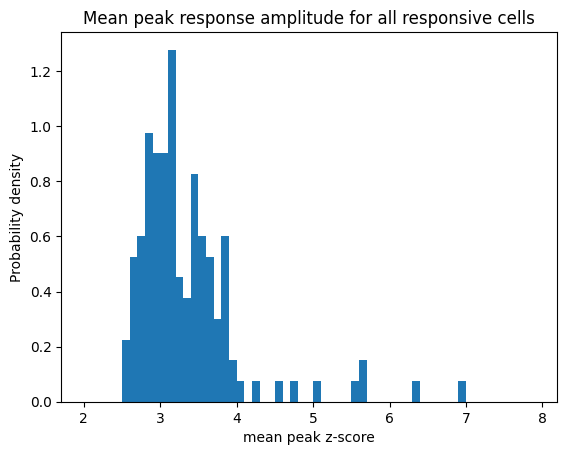

In [212]:
mean_amplitude = list(np.mean(matrix_thresholded,axis=0))

bins = np.arange(2,8,0.1)
plt.hist(mean_amplitude,bins=bins,density=True)
plt.title("Mean peak response amplitude for all responsive cells")
plt.ylabel("Probability density")
plt.xlabel("mean peak z-score")